In [1]:
from __future__ import division, print_function
from PIL import Image
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt

from disparity import CNN, CRF

# Load the L & R images

In [4]:
image_left = np.array(Image.open('../data/test/tsukuba_L.png'))
image_right = np.array(Image.open('../data/test/tsukuba_R.png'))

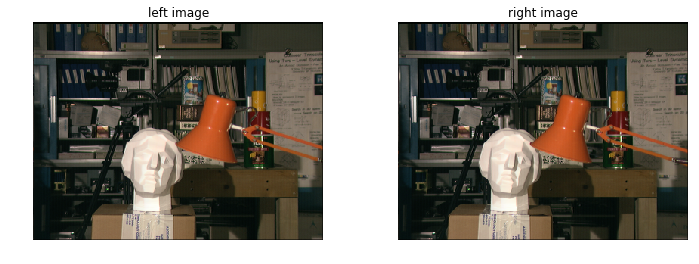

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].imshow(image_left)
axes[0].axis('off')
axes[0].set_title('left image')
axes[1].imshow(image_right)
axes[1].axis('off')
axes[1].set_title('right image')
plt.show()

# Compute initial disparity energies with CNN

In [6]:
energies = CNN.compute_energies(
    image_left, image_right, numDisparities=16
)
disparity = np.argmin(energies, axis=2)

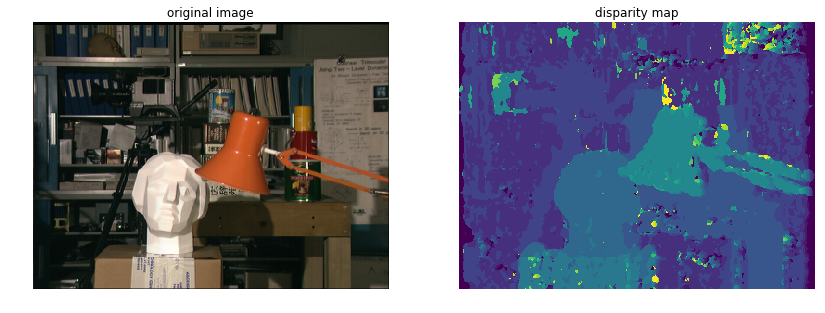

In [7]:
# visualize
fig, axes = plt.subplots(1,2,figsize=(14,5))
axes[0].imshow(image_right, cmap='gray')
axes[0].axis('off')
axes[0].set_title('original image')
axes[1].imshow(disparity)
axes[1].axis('off')
axes[1].set_title('disparity map')
plt.show()

# CRF smoothing

In [8]:
print(energies.shape)
print(energies.mean())
print(energies.std())

(288, 384, 16)
1.8539091
0.87038815


In [9]:
# scale the energies to zero mean and unit variance
energies -= energies.mean()
energies /= energies.std()

In [10]:
energies_p, losses = CRF.decode(
    energies, alpha=1.5, beta=0.2,
    lr=0.01, iterations=100
)

100%|██████████| 100/100 [00:14<00:00,  6.81it/s]


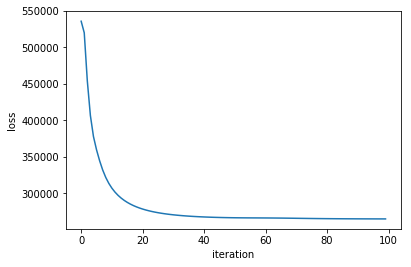

In [11]:
plt.figure(figsize=(6,4))
plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

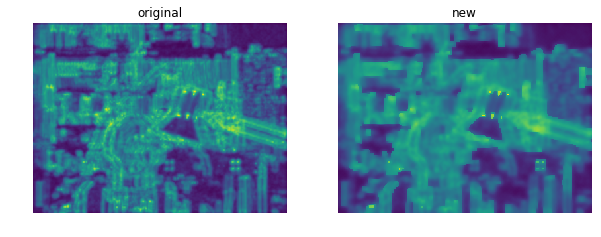

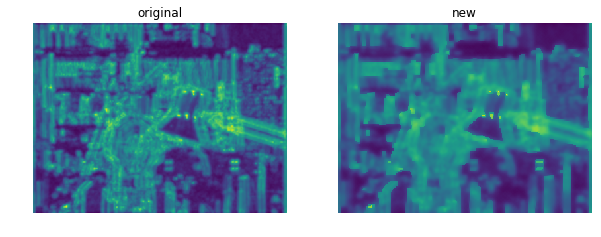

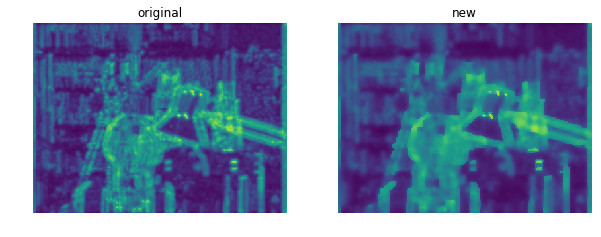

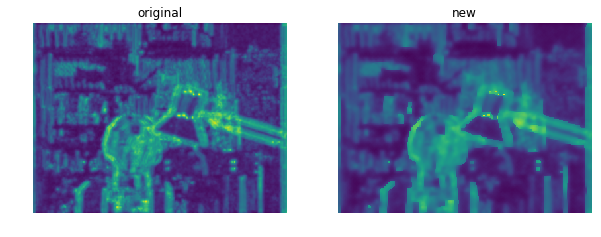

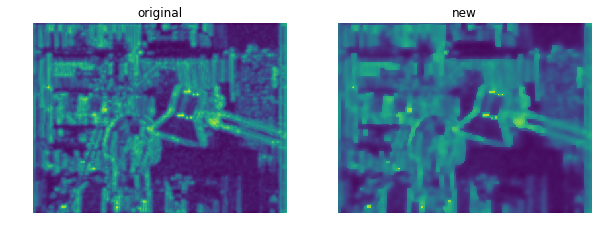

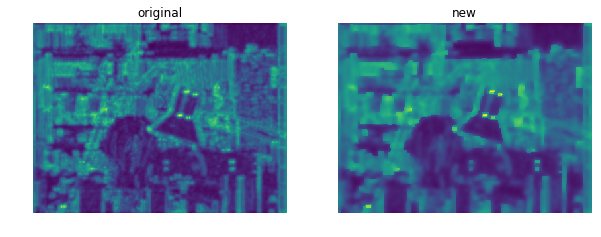

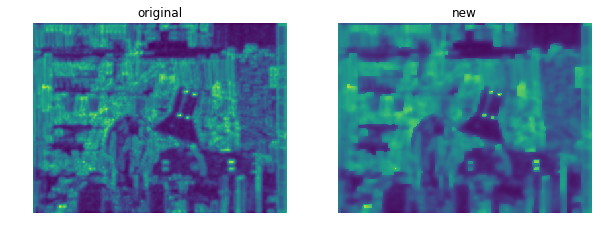

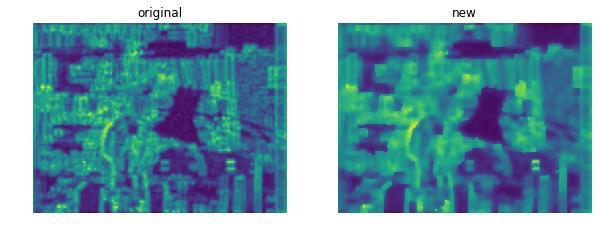

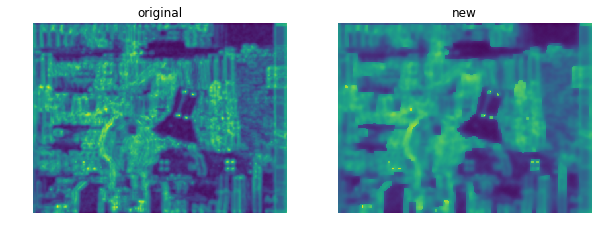

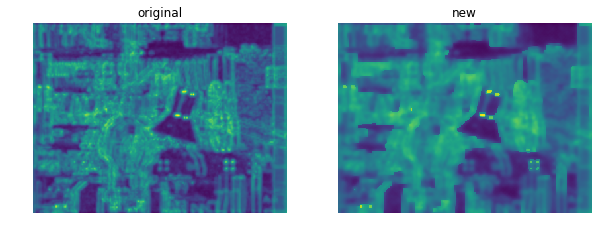

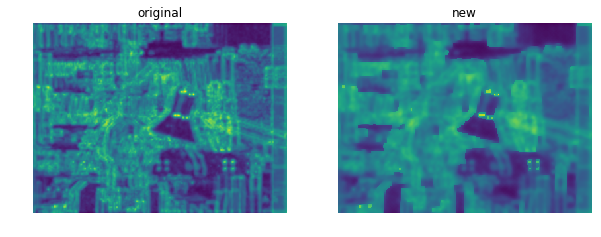

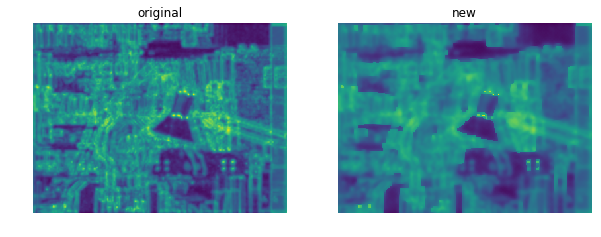

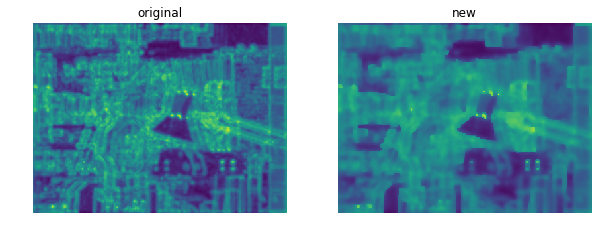

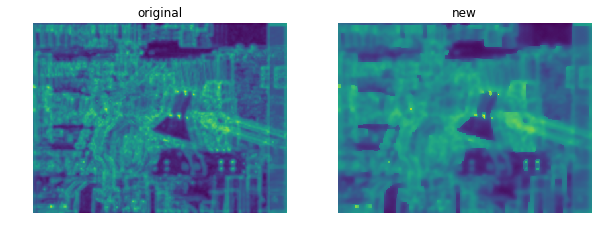

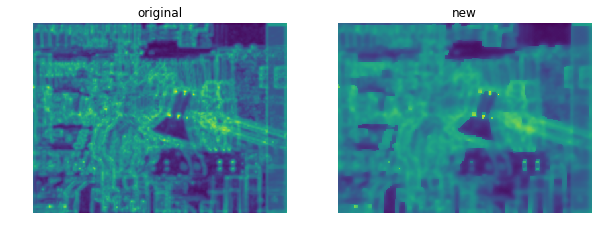

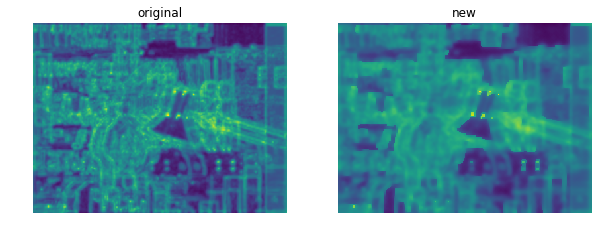

In [14]:
for i in range(energies.shape[-1]):
    # visualize
    fig, axes = plt.subplots(1,2,figsize=(10,4))
    axes[0].imshow(energies[:,:,i])
    axes[0].axis('off')
    axes[0].set_title('original')
    axes[1].imshow(energies_p[:,:,i])
    axes[1].axis('off')
    axes[1].set_title('new')
    plt.show()
    print('\n')

In [15]:
# compute new disparity
disparity_p = np.argmin(energies_p, axis=2)

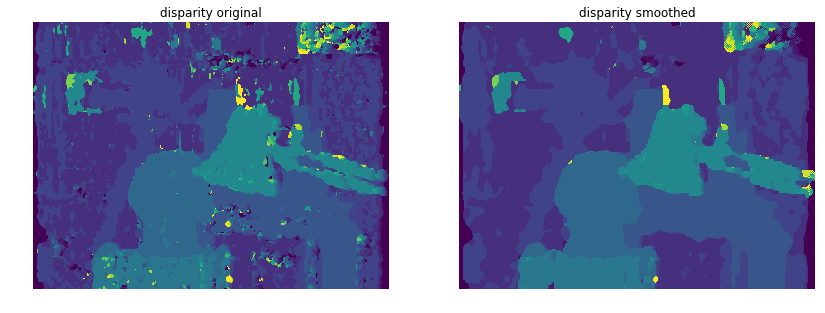

In [17]:
# visualize
fig, axes = plt.subplots(1,2,figsize=(14,5))
axes[0].imshow(disparity)
axes[0].axis('off')
axes[0].set_title('disparity original')
axes[1].imshow(disparity_p)
axes[1].axis('off')
axes[1].set_title('disparity smoothed')
plt.show()